# <div align='center'>第8章 非参数统计(1)</div>
### 内容
 <div align='left'>                  
     <font color='steelblue' size=4>
       8.1 经验分布和分布探索<br>
       8.2 单样本非参数统计推断<br>
       8.3 两独立样本的位置与尺度判断<br>
       8.4 多组数据位置推断<br>
       8.5 分类数据的关联分析<br>
       8.6 秩相关与分位数回归<br>
       8.7 非参数密度估计<br>
       8.8 一元非参数回归<br>
         </font>
       </div>

----------------


#### 基本概念
- 参数估计：数据样本被视为从分布族的某个参数抽取出来的总体的代表，未知的仅仅是总体分布具体的参数值。这种情况下，推断的任务就是对分布族的未知参数通过样本数据进行估计或假设检验，进而获得数据包含的分布。<br><br>

- 非参数估计：不假设总体分布的具体形式，尽量从数据（样本）本身获得所需要的信息，通过估计获得分布的结构，并逐步建立对事物的数学描述和统计模型。<br><br>

#### 非参数统计的特点
- 稳定性。非参数统计方法对总体的假定相对较少，效率高，结果一般有较好的稳定性。而参数统计方法一般要求事先假定数据服从某种概率分布，一旦实际不符合该分部便会导致结论性错误。<br><br>

- 通用性。非参数统计可以处理所有类型的数据，有广泛适用性。这些数据类型包括：定性数据(类别数据和顺序数据)，定量数据（等距离数据和比例数据）。<br><br>

- 具备可解释性，易于算法实现。<br><br>

- 缺点：如果对数据总体有充分了解，此时参数统计方法比非参数统计更可靠。

-----------------------------

## 8.1经验分布和分布探索

### 8.1.1 经验分布

- ### 定义：
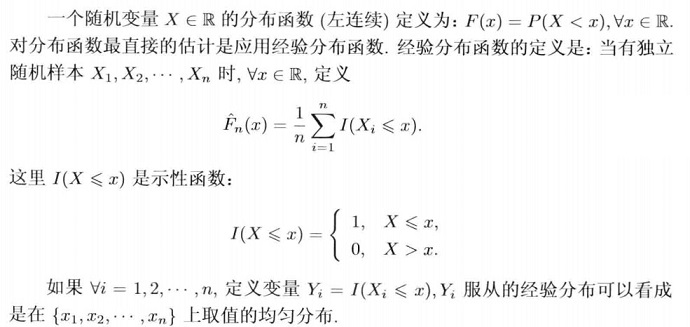

- ### 置信区间：

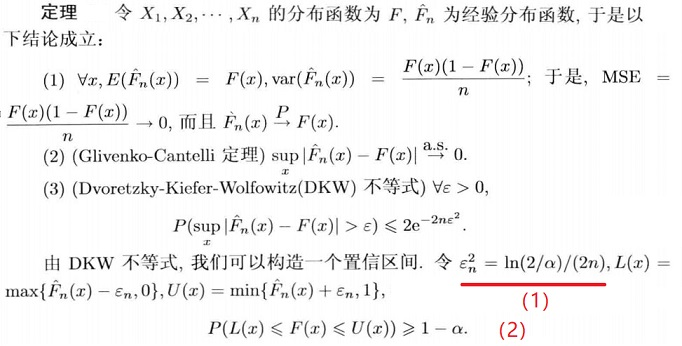

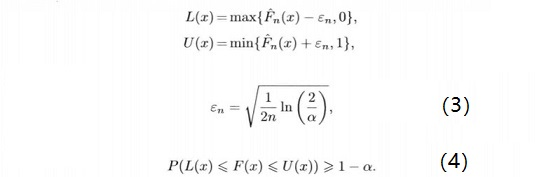

#### 例1：
1966年，Cox和Lewis两位科学家的研究报告给出了神经纤维细胞799次激活的等待时间的分布拟合，其数据分布函数。(数据见nerve.txt文件)


In [1]:
'''
  经验分布函数
'''
%reset -f
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats.anova as sma

import statsmodels.formula.api as smf
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

nerve_data = pd.read_table('e:\\data\\nerve.txt',header=None)
nerve_data.head()

,0
0,0.21 0.03 0.05 0.11 0.59
1,0.06 0.18 0.55 0.37 0.09
2,0.14 0.19 0.02 0.14 0.09
3,0.05 0.15 0.23 0.15 0.08
4,0.24 0.16 0.06 0.11 0.15


In [2]:
nerve_data = np.array(nerve_data).ravel()
n_data = []

for line in nerve_data:
    for d in line.split():
        n_data.append(float(d))
n_data[0:10]

[0.21, 0.03, 0.05, 0.11, 0.59, 0.06, 0.18, 0.55, 0.37, 0.09]

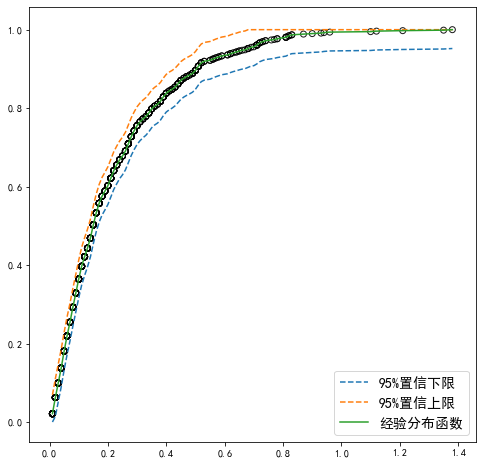

In [3]:
###数据排序
nerve = sorted(n_data)
###获取数据的秩
n_rank = st.rankdata(nerve)
###数据的长度
n= len(n_data)
###数据的经验分布函数：秩/数据长度
n_cdf = n_rank/n

###经验分布的置信区间：见上图中的公式(1)和(3)
band = np.sqrt((1/(2*n))*np.log(2/0.05))#置信区间的宽度
lower95 = n_cdf - band#下限
upper95 = n_cdf + band#上限
###下限小于0，则将之设为0；上限大于1，则将之设为1
lower95[np.where(lower95<0)]=0
upper95[np.where(upper95>1)]=1

plt.figure(figsize=(8, 8))
plt.plot(nerve,lower95,'--',label='95%置信下限')
plt.plot(nerve,upper95,'--',label='95%置信上限')
plt.plot(nerve,n_cdf,label='经验分布函数')
plt.scatter(nerve,n_cdf,facecolor = 'None', edgecolor = 'k', alpha = 0.9)
plt.legend(fontsize=14)
plt.show()

### 8.1.2 生存函数
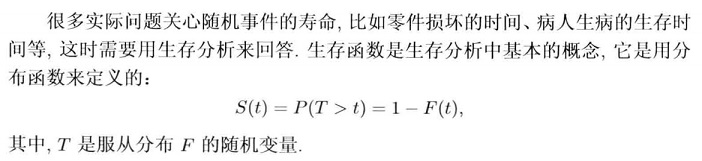

#### 例2：
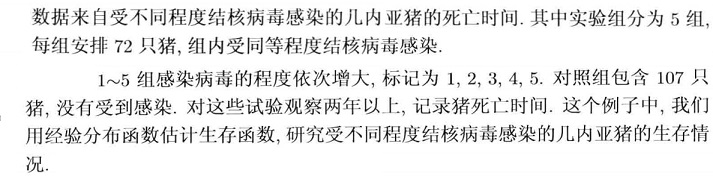

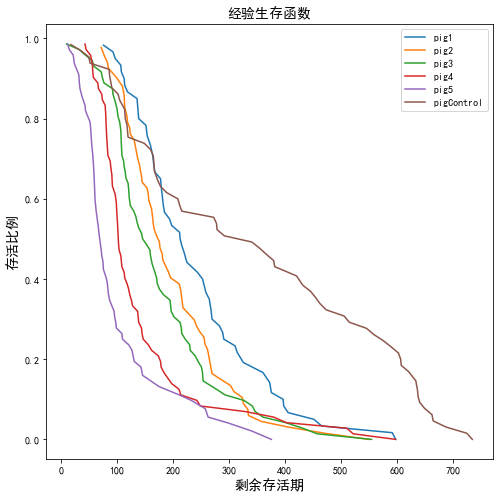

In [4]:
'''
  生存函数
'''
def sf(data):
    sorted_data = sorted(data)
    n_rank = st.rankdata(sorted_data)
    n = len(sorted_data)
    ##生存函数(有时称为“残存函数”)
    sf = 1 - n_rank/n ##sf=1-cdf
    return sf
    
pig1 = np.sort(pd.read_table('e:\\data\\pig_data\\gpigs1.txt',header=None).T).ravel()
pig2 = np.sort(pd.read_table('e:\\data\\pig_data\\gpigs2.txt',header=None).T).ravel()
pig3 = np.sort(pd.read_table('e:\\data\\pig_data\\gpigs3.txt',header=None).T).ravel()
pig4 = np.sort(pd.read_table('e:\\data\\pig_data\\gpigs4.txt',header=None).T).ravel()
pig5 = np.sort(pd.read_table('e:\\data\\pig_data\\gpigs5.txt',header=None).T).ravel()
pigControl = np.sort(pd.read_table('e:\\pig_data\\gpigscontrol.txt',header=None).T).ravel()
plt.figure(figsize=(8,8))
plt.plot(pig1,sf(pig1),label='pig1')
plt.plot(pig2,sf(pig2),label='pig2')
plt.plot(pig3,sf(pig3),label='pig3')
plt.plot(pig4,sf(pig4),label='pig4')
plt.plot(pig5,sf(pig5),label='pig5')
plt.plot(pigControl,sf(pigControl),label='pigControl')
plt.xlabel('剩余存活期',size=14)
plt.ylabel('存活比例',size=14)
plt.title('经验生存函数',size=14)
plt.legend()
plt.show()

In [5]:
###风险比函数方差
def vcdf(data):
    sorted_data = sorted(data)
    n_rank = st.rankdata(sorted_data)
    n = len(sorted_data)
    cdf =  n_rank/n
    vf = cdf/(n*(1-cdf))
    return vf

f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
No handles with labels found to put in legend.


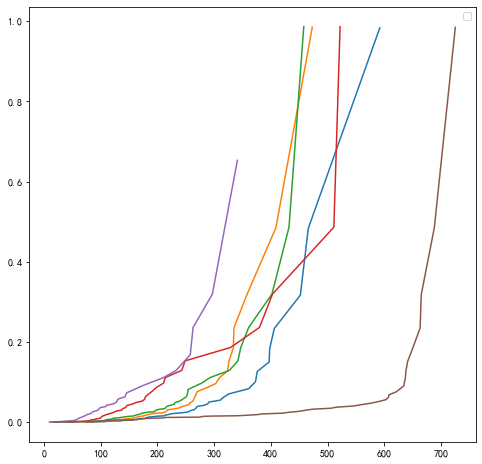

In [6]:
plt.figure(figsize=(8,8))
plt.plot(pig1,vcdf(pig1))
plt.plot(pig2,vcdf(pig2))
plt.plot(pig3,vcdf(pig3))
plt.plot(pig4,vcdf(pig4))
plt.plot(pig5,vcdf(pig5))
plt.plot(pigControl,vcdf(pigControl))
plt.legend()
plt.show()

---

### 8.1.3 秩检验统计量

- #### 顺序统计量与秩
非参数统计使用观测值得顺序作为研究的主要对象之一。对于样本$X_1,X_2,...,X_n$,如果按照升幂排序，得到：
$X_(1),X_(2),...X_(n)$，称之为顺序统计量（order statistic）


- #### U统计量
可以参考：吴喜之，赵博娟编著《非参数统计》（中国统计出版社）

- #### 无结点数据的秩
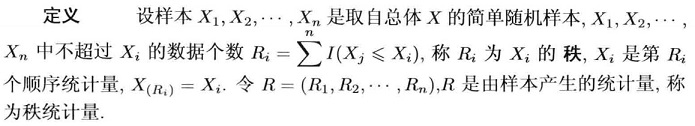

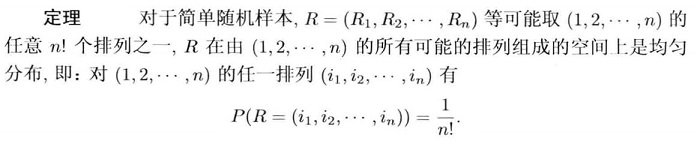
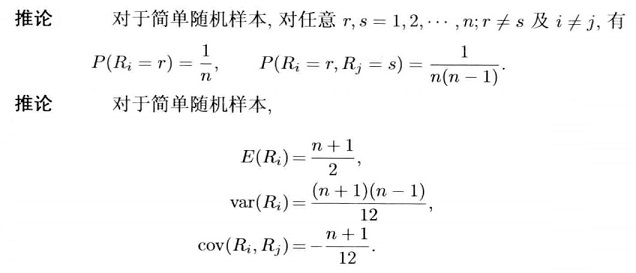

In [7]:
'''
使用scipy的rankdata函数计算秩
例3：计算观测数据[300,230,208,580,690,200,263,215,520]的秩
'''
spending=np.array([300,230,208,580,690,200,263,215,520])
rank=st.rankdata(spending)
rank

array([6., 4., 2., 8., 9., 1., 5., 3., 7.])

- #### 有结数据的秩
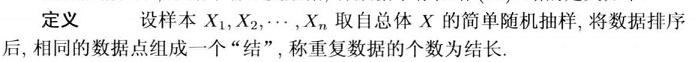
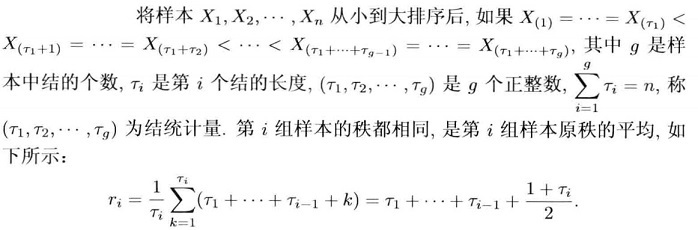

In [8]:
'''
例4：计算观测值：[2,2,4,7,7,7,8,9,9,9,9,10]的秩
'''
data=np.array([2,2,4,7,7,7,8,9,9,9,9,10])
rank=st.rankdata(data)
rank

array([ 1.5,  1.5,  3. ,  5. ,  5. ,  5. ,  7. ,  9.5,  9.5,  9.5,  9.5,
       12. ])

---------

## 8.2 单样本非参数统计推断

## 8.2.1 符号检验
- #### 概念
sign test关心的信息与两类观测值有关，用符号"+"和"-"进行区分，符号检验通过上述符号的个数进行统计推断。

- #### 推断过程
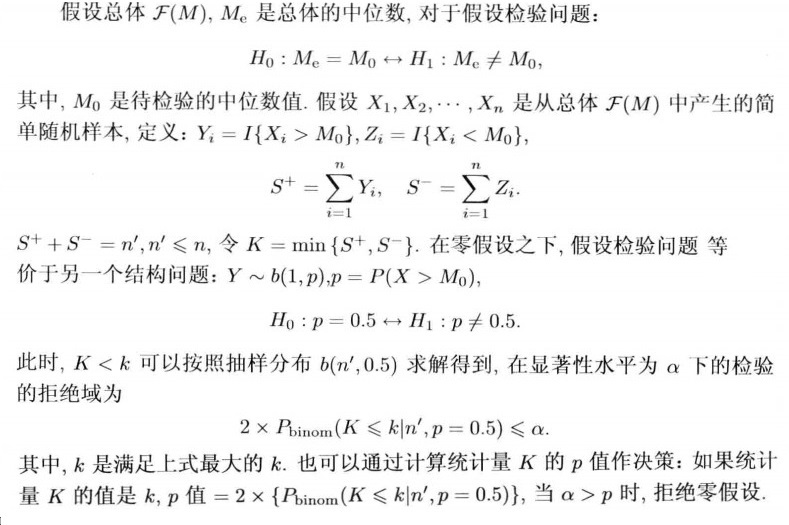

#### 例1：
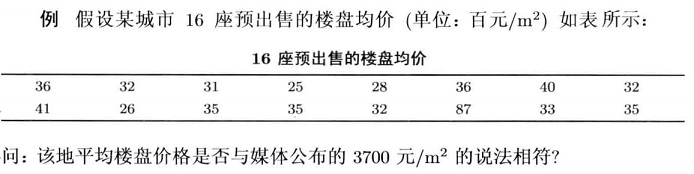

In [19]:
'''
分别使用t检验与二项分布检验
'''
prices=np.array([36,32,31,25,28,36,40,32,41,26,35,35,32,87,33,35])
### 单个样本的t检验,原假设为均值等于给定值
st.ttest_1samp(prices,37)

Ttest_1sampResult(statistic=-0.141233170716508, pvalue=0.8895650329479428)

In [20]:
###通过二项式分布检验
length=len(prices)
#均值大于37的比率
success=np.sum(prices>37)
ps=success/length
#检验大于中位数37的房价概率是否等于0.5
p_binom=st.binom_test(success,length,0.5)
###二项分布检验的置信区间使用beta分布进行计算。
lower_success=st.beta.ppf(0.025, success, length - success +1)
upper_success=st.beta.ppf(0.975, success+1, length - success)
print("二项分布检验的p值为：",p_binom,
      '\n\n概率的置信区间为：[%0.8f,%0.8f]'%(lower_success,upper_success))
print('\n房价大于37的实际比率为：',ps)

二项分布检验的p值为： 0.021270751953125 

概率的置信区间为：[0.04047373,0.45645655]

房价大于37的实际比率为： 0.1875


#### 结果解析
- 单样本的t检验(双侧检验)原假设是样本的均值等于给定数值（即假设的总体均值），很显然该检验结果的p值远大于0.05，即不能拒绝原假设。


- 二项分布检验对问题进行简单变形，以37为标准，如果大于该值和小于该值的样本数相同，那么说明房价中位数等于37。设大于37的符号为"+"，反之为"-"，然后对两个符号的数目进行检验，这是典型的符号检验问题。如果将概率设为0.5，即检验两个符号的样本数据的个数是否相等。


- binom_test函数的原假设是“成功”概率等于指定概率（此处为0.5），通过二项分布检验的结果可以看出，p值小于0.05，即可以拒绝原假设，即房价大于37的房子比率不等于0.5，可以推断房价中位数不等于37。


- 很显然，对相同问题t检验和二项分布检验的结果是矛盾的。可以有多种解释：首先可能出发点不一样，t检验的对象是均值，而二项检验实质上检验的是中位数，二者还是有区别的；其次，t检验不拒绝原假设，并不是完全等同接受原假设，很有可能是数据收集不充分，如果要拒绝原假设需要收集更多数据，提高检验的功效(Power)。


- 另外一个很重要的原因就是t检验很有可能对数据的分布假设是错误的或不适当的，也就是说房价数据很有可能不符合正态分布，因此这个时候使用t检验得到的结果不可靠，即犯了第二型错误（“取伪”）。第一型错误为“拒真”。


- 符号检验不事先对数据的分布做出假设，这样得出的检验结果更可靠。

### 8.2.2 分位数检验
- #### 假设检验问题

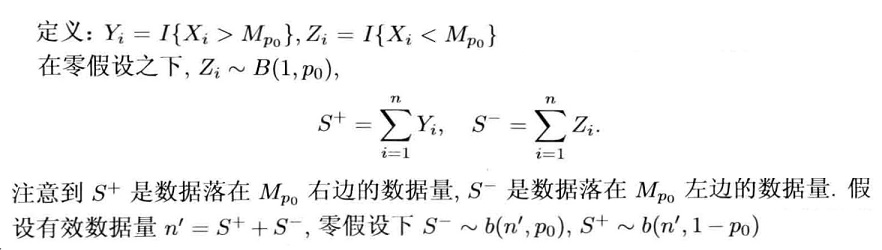

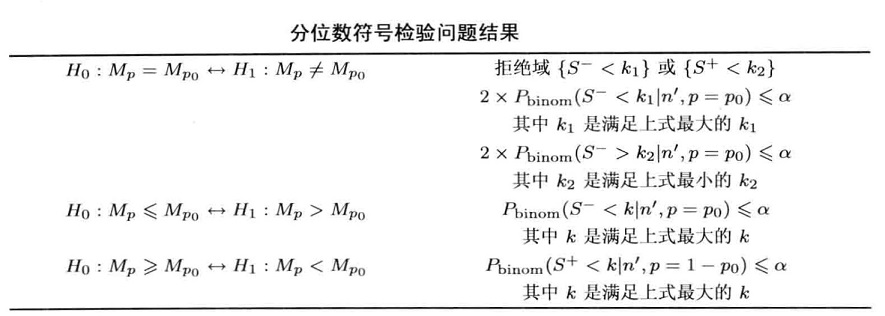

#### 例5：

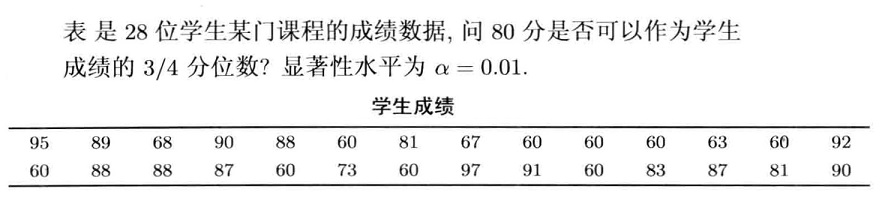

假设检验问题：$H_0:M_{0.75}=80 \Leftrightarrow H_1:M_{0.75}\neq80$

In [21]:
'''
本例属于表中第一类检验问题,属于双侧检验，p值计算的概率应该乘以2
检验结果表明p值小于0.05，拒绝原假设，认为该数据的3/4分位数不是80
'''
scores=np.array([95,89,68,90,88,60,81,67,60,60,60,63,60,92,
                 60,88,88,87,60,73,60,97,91,60,83,87,81,90])
s1=np.sum(scores>80)
s2=np.sum(scores<80)
###p值计算
2*st.binom.cdf(s2,s1+s2,0.75)

0.002237112950567278

---

### 8.2.3 Cox-Stuart趋势存在性检验
#### 基本思想
- 回归分析是一种结构性的趋势分析算法，但是有时候不一定能分析所有趋势

- 按照固定间隔将数据分成数据对，然后比较前后对数据的取值大小，即可分析出趋势。

- 假设检验

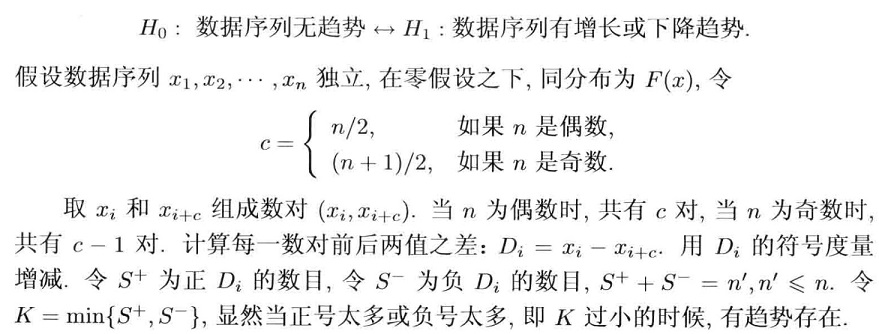

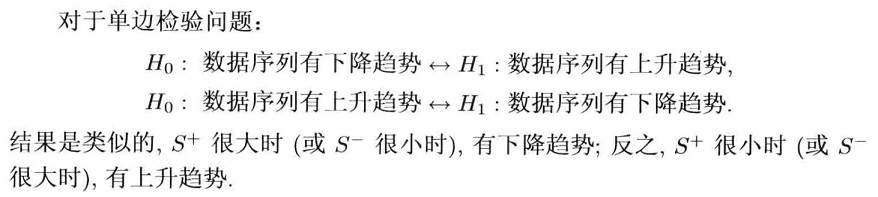


<br><br>

#### 例6:
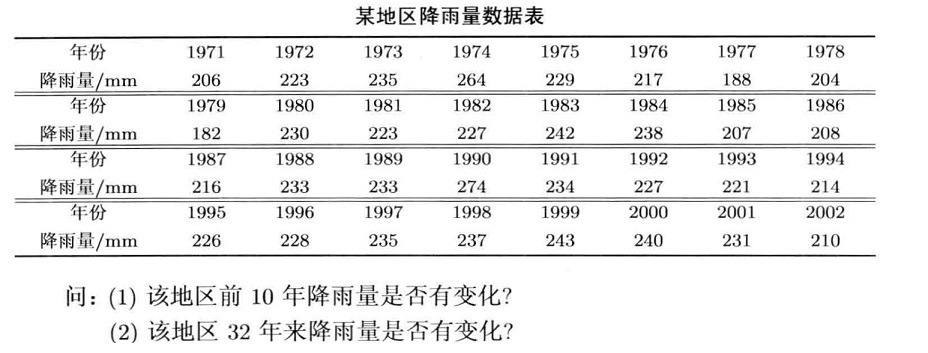


In [32]:
'''
Cox-Stuart趋势检验函数，此检验方法比较常用。
原假设：数据无上升趋势；备择假设：数据有上升趋势。
'''
import numpy as np
import pandas as pd
import scipy.stats as st
def cox_stuart(lst):
    n0=len(lst)
    if n0%2==1:
        n0=n0+1
    #数对间隔，缺省是样本数据长度的一半
    c=int(len(lst)/2)
    #正号和负号的数目，初始化为0
    pos=neg=0
    for i in range(c):
        #数对前后两值之差
        diff=lst[i+c]-lst[i]
        #正号和负号的判定
        if diff>0:
            pos+=1
        elif diff<0:
            neg+=1
        else:##数对相等，不做判定继续进行下一个数对的对比
            continue
    n1=pos+neg ##正负号的总个数
    k=min(pos,neg) ##k值为正负号个数中最小的那个
    
    ###检验p值的计算，双边检验p值需乘以2
    p=2*st.binom.cdf(k,n1,0.5)
    return pos,neg,p

In [11]:
'''
代码运行结果说明：
(1) 该地区头10年降雨量没有明显趋势，因为p值等于1，远大于0.05，不能拒绝无趋势的原假设。
(2) 该地区近32年降雨量有明显上升趋势，p值等于0.00418091，小于0.05，拒绝无趋势的原假设。
'''
rain = [206,223,235,264,229,217,188,204,182,230, 223,227,
        242,238,207,208,216,233,233,274,234,227,221,214,
        226,228,235,237,243, 240,231,210]
###前10年和近32年的降雨量有无上升
rise_10,fall_10,pvalue10=cox_stuart(rain[0:10])
rise_32,fall_32,pvalue32=cox_stuart(rain)
print('前10年的上升次数：%d，下降次数：%d，检验p值分别为：%0.8f'%(rise_10,fall_10,pvalue10))
print('\n近30年的上升次数：%d，下降次数：%d，检验p值分别为：%0.8f'%(rise_32,fall_32,pvalue32))

前10年的上升次数：2，下降次数：3，检验p值分别为：1.00000000

近30年的上升次数：14，下降次数：2，检验p值分别为：0.00418091


In [12]:
'''
对降雨量按照年份做回归分析，然后对回归分析的结果进行方差分析。
结果显示F检验的p值等于0.218569，表明降雨量按照年份来说无显著的线性关系。
同时也说明使用结构性方法无法对上述降雨量数据进行趋势分析。
曲线图也显示线性趋势不显著。
'''
years=np.arange(1971,2003,1)
results=smf.ols("rain~years",{'years':years,'rain':rain}).fit()
sma.anova_lm(results)

,df,sum_sq,mean_sq,F,PR(>F)
years,1.0,535.363728,535.363728,1.579228,0.218569
Residual,30.0,10170.105022,339.003501,NaN,NaN


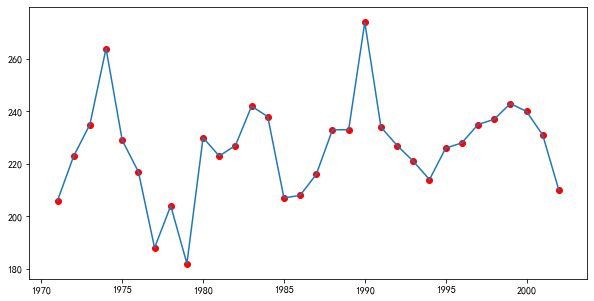

In [13]:
'''
线性趋势曲线
'''
plt.figure(figsize=(10,5))
plt.plot(years,rain)
plt.scatter(years,rain,color='r')
plt.show()

----

### 8.2.4 随机游程检验

- #### 概念

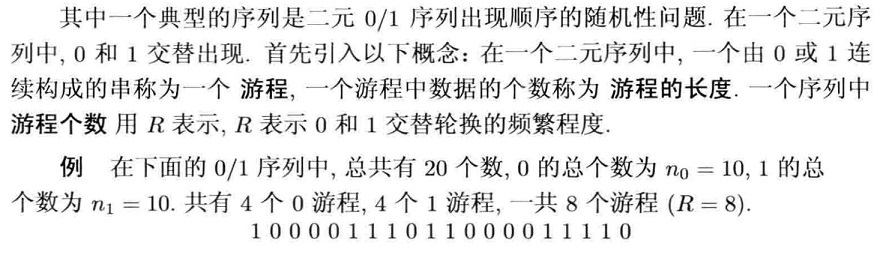

- ####  拒绝域
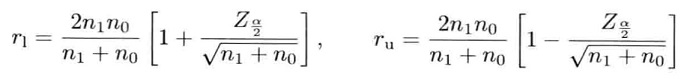

In [14]:
'''
上例计算
'''
from statsmodels.sandbox.stats.runs import runstest_1samp
data=[1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0]
n1=10#1的个数
n0=10#0的个数
z=st.norm.ppf(0.025)/((n1+n0)**0.5)
ru=(2*n1*n0/(n1+n0))*(1+z)#拒绝域上限
rl=(2*n1*n0/(n1+n0))*(1-z)#拒绝域下限
r=8#游程数
print('随机游程检验的拒绝域上限：%0.6f，下限为：%0.6f，游程数为：%d'%(rl,ru,r))
print('\n通过StatsModels的函数检验p值为：',runstest_1samp(data)[1])

随机游程检验的拒绝域上限：14.382613，下限为：5.617387，游程数为：8

通过StatsModels的函数检验p值为： 0.2506917798689591


#### 结果解析

- 随机游程检验的假设：$H_0$: 数据出现顺序随机 $\Leftrightarrow H_1$: 数据出现不随机。

- 根据计算结果：$5.617387 < R=8 < 14.382613$，游程数位于拒绝域的置信区间内，所以不能拒绝原假设。


- 根据StatsModels的runstest_1samp函数检验随机游程，p值大于0.05，因此不能拒绝数据出现顺序随机的原假设。

#### 例2：
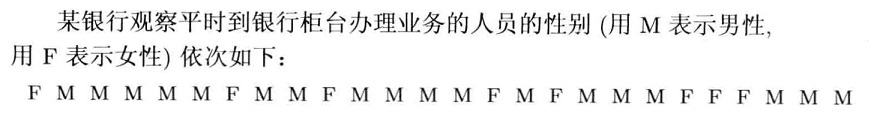

In [15]:
genders=np.array(['F','M','M','M','M','M','F','M','M','F','M',
                  'M','M','M','F','M','F','M','M','M','F','F',
                  'F','M','M','M'])
gens=[]
###将数据转换成int类型的0和1
for i in genders:
    if i=='M':
        gens.append(1)
    else:
        gens.append(0)
n1=18
n0=8
z=st.norm.ppf(0.025)/((n1+n0)**0.5)
rl=(2*n1*n0/(n1+n0))*(1+z)
ru=(2*n1*n0/(n1+n0))*(1-z)
r=12 #游程数
###结果显示游程数位于假设检验的置信区间范围内
#不能拒绝原假设
rl,ru,r,runstest_1samp(gens)[1]

(6.819169163172581, 15.334676990673573, 12, 0.8413055181074309)

In [16]:
'''
构造一个规律性很强，随机性不强的测试数据。
结果显示，该数据出现顺序不随机。
'''
data1=[0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1]
n1=12
n0=9
z=st.norm.ppf(0.025)/((n1+n0)**0.5)
rl=(2*n1*n0/(n1+n0))*(1+z)
ru=(2*n1*n0/(n1+n0))*(1-z)
r=4 #游程数
###结果显示游程数位于假设检验的置信区间范围之外
#游程检验函数的p值小于0.05，拒绝原假设。
rl,ru,r,runstest_1samp(data1)[1]

(5.886522456224299, 14.684906115204274, 4, 0.001901683155591874)

---

### 8.2.5 Wilcoxon符号秩检验

- #### Wilcoxon符号秩检验过程-要求数据符合对称性要求

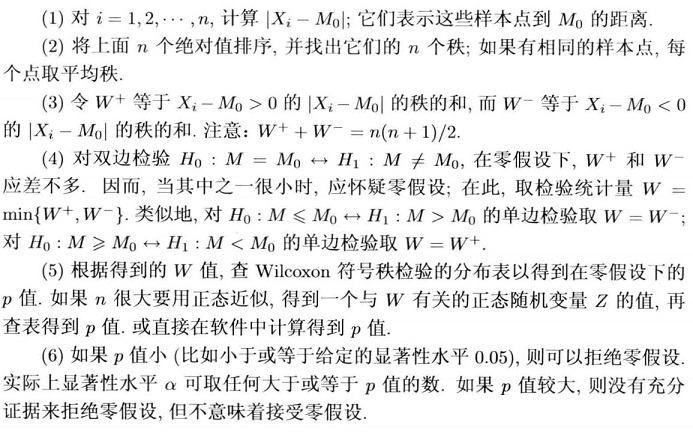


#### 例1：
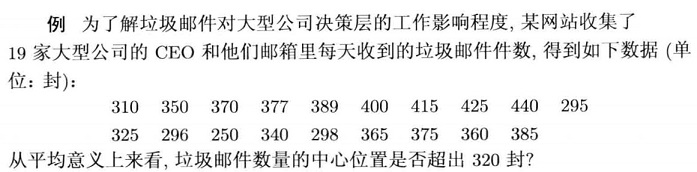

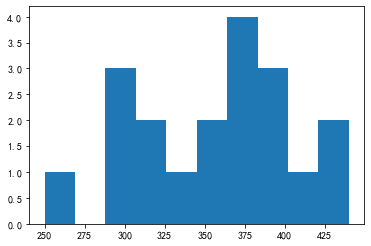

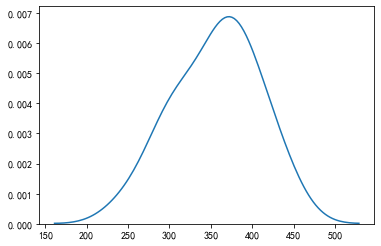

(WilcoxonResult(statistic=158.0, pvalue=0.9958839416503906),
 WilcoxonResult(statistic=32.0, pvalue=0.00945281982421875))

In [17]:
'''
通过直方图和密度曲线可以看出数据大致上对称的。
首先用数据减去320，然后使用符号秩检验。
'''
spammails = np.array([310,350,370,377,389,400,415,425,440,295,
                 325,296,250,340,298,365,375,360,385])
##直方图
plt.hist(spammails)
plt.show()
##密度曲线
sns.kdeplot(spammails)
plt.show()

'''
使用wilcoxon进行符号秩检验。
（1）单边检验：
alternative='less'，表示原假设为大于0.
即spammails-320>0，也就是其中位数大于320，即中心位置超过320.
计算结果的p值0.9958839416503906，显然不能拒绝中心位置超过320的原假设。
（2）双边检验：
alternative默认等于‘two-sided’，即双侧检验。
很显然，pvalue=0.00945281982421875，拒绝等于0的原假设。
'''
###双边检验与单边检验
st.wilcoxon(spammails-320,alternative='less'),st.wilcoxon(spammails-320)

-----

### 8.2.6 正态记分检验
 - #### 基本原理
 数据的秩转换成正态分布的分位数，然后再对分位数进行分析和检验的方法称之为正态记分检验（normal score test）
 
 - #### 记分公式
 
 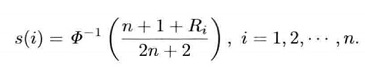
  
 - #### 实现步骤
 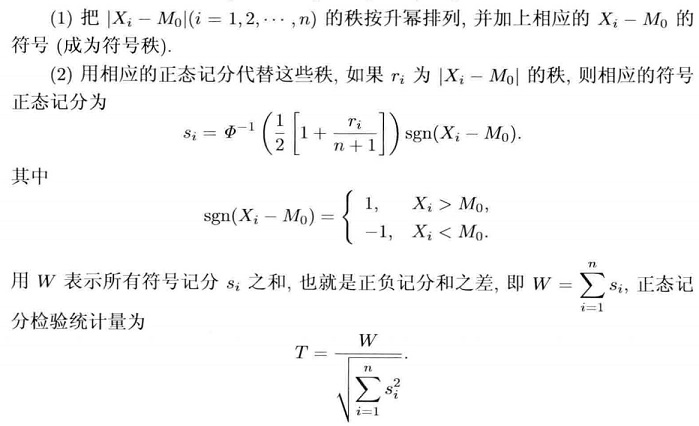
 
 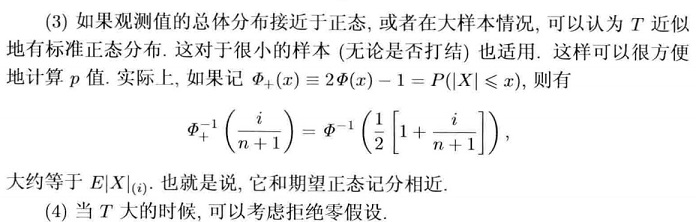

 

#### 例2：
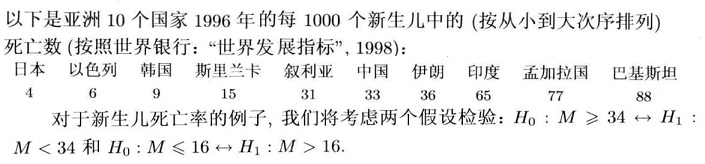



In [11]:
'''
正态记分检验函数
data：被检验数据
m0：比较对象
alternative：备择假设，默认为'greater'，即原假设为‘小于某值’
'''
def normal_score_test(data,m0,alternative='greater'):
    diff=data-m0#差
    diff_abs=np.abs(diff)#差的绝对值
    rank_abs=st.rankdata(diff_abs)#差绝对值的秩
    n=len(data)
    ###求符号秩
    rank_sign=st.norm.ppf((1/2)*(1+rank_abs/(n+1)))*np.sign(diff)
    ###W值
    w=np.sum(rank_sign)
    ###正态记分检验统计量
    t_sign=w/np.sum(rank_sign**2)**0.5
    
    ###根据alternative计算p值
    if alternative=='greater':
        pvalue=st.norm.sf(t_sign)
    else:
        pvalue=st.norm.cdf(t_sign)
    return np.round(w,3),np.round(t_sign,3),np.round(pvalue,5)

###第一次调用原假设设为"大于34"；第二个调用原假设为"小于16"
rate=np.array([4,6,9,15,31,33,36,65,77,88])
normal_score_test(rate,34,'less'),normal_score_test(rate,16,'greater')

((1.156, 0.409, 0.65856), (5.218, 1.844, 0.03258))

---

### 8.2.7 分布一致性检验
连续型数据一般需判断是否服从正态分布，离散型数据则一般需要判定是否来自二项分布或Possion分布。

- #### $\chi^2$ 拟合优度检验

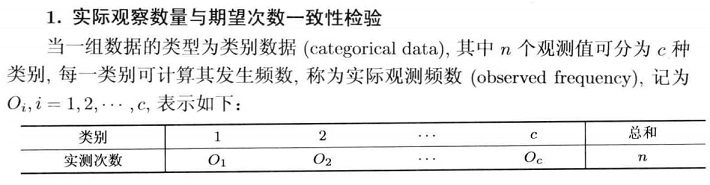

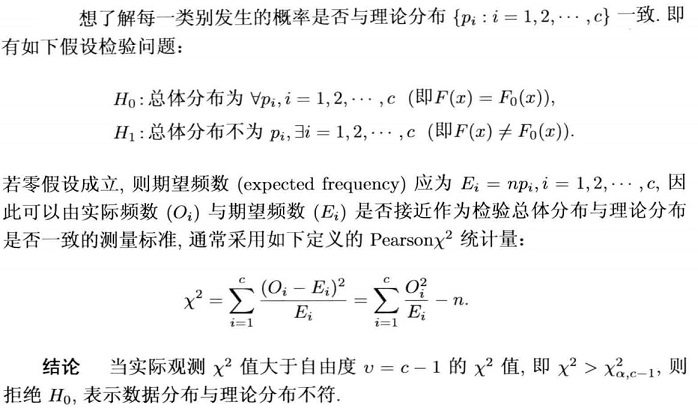

#### 例1：
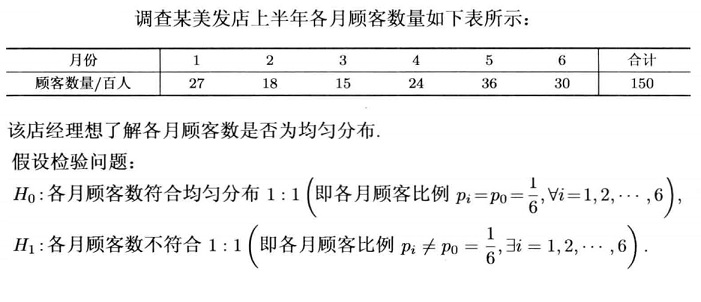

In [23]:
'''
1:1表示每月的顾客比例为1/6，因此原假设就可以设置为p0=1/6的均匀分布
'''
customers=np.array([27,18,15,24,36,30])
m=150*1/6
chi2_value=np.sum(((customers-m)**2)/m)
chi2_1=st.chi2.ppf(0.95,6-1)
print('检验chi-square:',chi2_value)
print('显著性水平为0.05的chi-square值（自由度：n-1）：', chi2_1)
print('p值：',st.chi2.sf(chi2_value,5),'，小于0.05，拒绝原假设。')

检验chi-square: 12.0
显著性水平为0.05的chi-square值（自由度：n-1）： 11.070497693516351
p值： 0.03478778050624185 ，小于0.05，拒绝原假设。


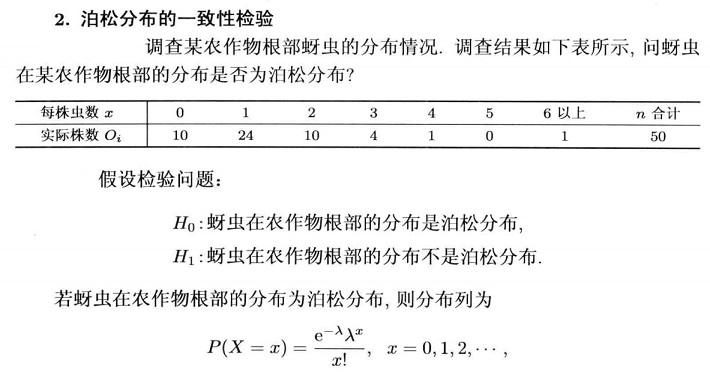
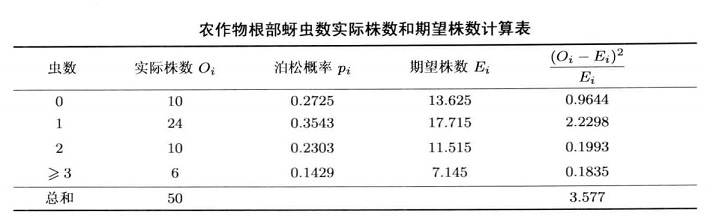

In [24]:
from scipy.special import factorial
#大于6是1株，5是0株，可以将5估计为1，排除6个虫数及以上的数据
#估计泊松分布的参数lambda
lam=(0*10+1*24+2*10+3*4+4*1+5*1)/50
aphis=np.array([0,1,2,3,4,5])
##现计算前5个数据的泊松分布概率，然后用1减去其总和，得到第6个样本的概率
p=(np.exp(-lam)*lam**aphis[0:5])/factorial(aphis[0:5])
p5=1.0-np.sum(p)
##除了大于6个虫数以外其他所有虫数的概率
p=np.concatenate((p,p5),axis=None)

##将概率分为[0,1,2,>=3]四个档次
p1=np.concatenate((p[0:3],np.sum(p[3:])),axis=None)
##虫数>=3的株数总共是6株
plants=np.array([10,24,10,6])
m=50*p1
chi2_value=np.sum(plants**2/m)-50
chi2_1=st.chi2.ppf(0.95,3-1)
print('检验chi-square:',chi2_value)
print('显著性水平为0.05的chi-square值（自由度：n-1）：', chi2_1)
print('被检验数据的chi-square小于显著性水平为0.05的chi-square值，不能拒绝原假设')
print('p值：',st.chi2.sf(chi2_value,2),'，大于0.05，不能拒绝原假设（即数据符合泊松分布）')

检验chi-square: 3.5778615655276127
显著性水平为0.05的chi-square值（自由度：n-1）： 5.991464547107979
被检验数据的chi-square小于显著性水平为0.05的chi-square值，不能拒绝原假设
p值： 0.16713878182879127 ，大于0.05，不能拒绝原假设（即数据符合泊松分布）


---

### 8.2.8 Komogorov-Smirnov与Liliefor正态性检验
- #### Komogorov-Smirno正态性检验
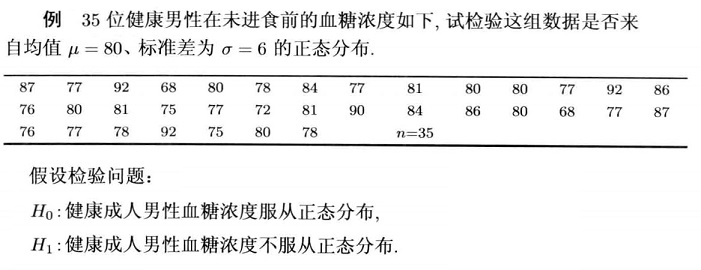

In [25]:
'''
调用scipy的kstest函数对数据进行正态性检验。
可以在args参数里指定正态性检验的均值和标准差。
结果显示，不能拒绝数据服从正态性分布的原假设。
'''
concen=np.array([87,77,92,68,80,78,84,77,81,80,80,77,92,86,
                76,80,81,75,77,72,81,90,84,86,80,68,77,87,
                76,77,78,92,75,80,78])
st.kstest(concen,'norm',args=(80,6))

KstestResult(statistic=0.14810188167481064, pvalue=0.38832688873280896)

- #### Liliefor正态性检验

In [26]:
'''
使用Statsmodels的lilliefors函数对数据进行正态性检验。
p值小于0.05，所以拒绝服从正态分布的原假设。
这个和前面的KS检验矛盾。
'''
import statsmodels.stats.api as sst
import statsmodels.stats as sms
import statsmodels.stats.diagnostic as ssd
ssd.lilliefors(concen)

(0.16523133357717523, 0.018805451195889625)

In [27]:
'''
使用scipy的shapiro函数进行检验
p值在显著性水平0.05附近，尽管理论上不能拒绝服从正态性分布的原假设，
但是仍很可疑。
'''
st.shapiro(concen)

ShapiroResult(statistic=0.9447759985923767, pvalue=0.07831479609012604)

In [28]:
'''
使用生成的正态分布的随机数据进行检验，检验结果很显然符合正态分布。
'''
norm1=st.norm.rvs(1,4,100)
ssd.lilliefors(norm1)

(0.06605698153827089, 0.3594427891301567)

---------

## 8.3 两独立样本的位置与尺度判断
- #### 基本概念
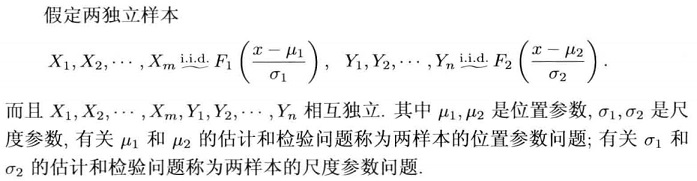

- #### 位置与尺度判断函数

（1）中位数位置检验：Brown-Mood中位数检验和Mann-Whitney秩和检验

（2）尺度检验：Mood方法和Moses方法

### 8.3.1 Brown-Mood中位数检验
- #### 基本原理：
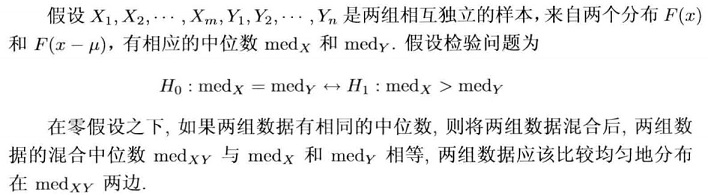

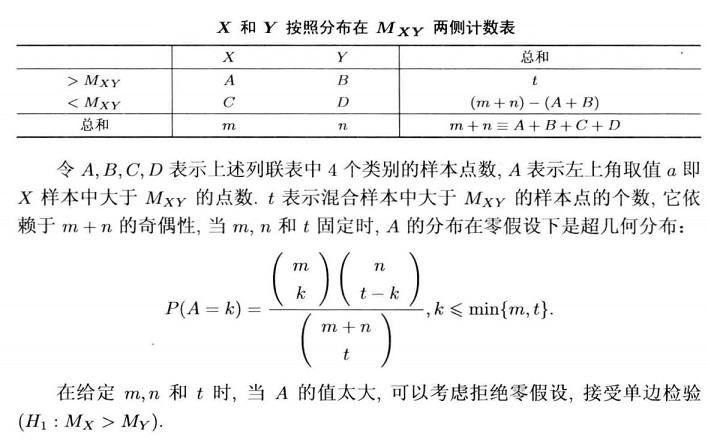
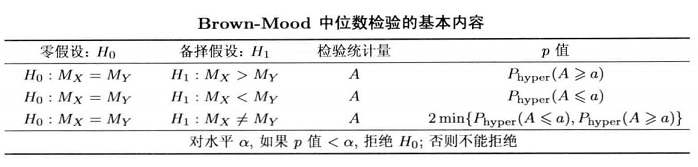

- #### 例1：
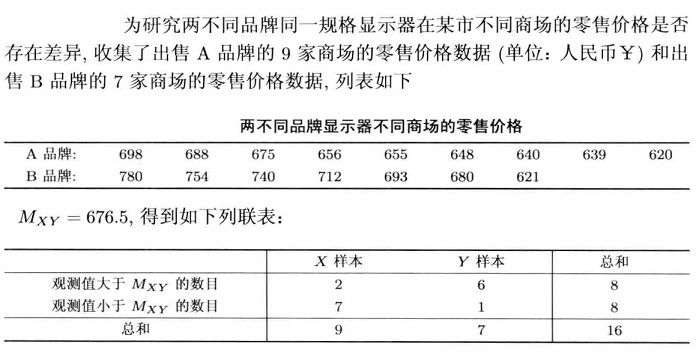

In [14]:
'''
计算2X2列联表中的值。
首先计算P(A<=a),即H1：Mx<My。
即备择假设是x的中位数小于y的中位数。
'''
from math import factorial
###手工计算P(A=k)这个公式，
#注意离散型随机变量的分布函数计算和连续型随机变量的计算不同方式。
#当a=2时概率质量函数
mk2=factorial(9)/(factorial(2)*factorial(7))
tk2=factorial(7)/(factorial(6)*factorial(1))
t2=factorial(16)/(factorial(8)*factorial(8))
pmf_2=mk2*tk2/t2
###当a=1时概率质量函数
mk1=factorial(9)/(factorial(1)*factorial(8))
tk1=factorial(7)/(factorial(7)*factorial(0))
t1=factorial(16)/(factorial(8)*factorial(8))
pmf_1=mk1*tk1/t1
###P(A<=a)概率分布函数=等于两个质量函数之和
pvalue=pmf_1+pmf_2
print('p值为：',pvalue,',p值小于0.05，即接受备择假设，Mx<My.')

p值为： 0.020279720279720283 ,p值小于0.05，即接受备择假设，Mx<My.


- ##### 超几何分布的概率密度函数
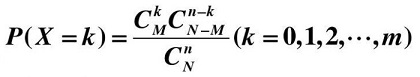

In [35]:
'''
使用超几何分布函数计算p值,仍以H1：Mx<My为例。
'''
x=np.array([698,688,675,656,655,648,640,639,620])
y=np.array([780,754,740,712,693,680,621])
#拼合x和y构成一个完整数组
xy=np.concatenate([x,y],axis=None)
#总样本的中位数
m=np.median(xy)
#总样本中大于中位数的个数
t=np.sum(xy>m)
#样本x的个数
lx=len(x)
#样本y的个数
ly=len(y)
#x和y的总个数
lxy=lx+ly
#样本x中大于中位数的个数
A=np.sum(x>m)

'''
p值计算过程：
总样本为lxy个，其中有t个大于中位数的样本数据，
然后从样本中抽样lx个，这个lx个抽样中有A个或A个以下大于中位数的样本的概率是多少'''
pvalue=st.hypergeom.cdf(A,lxy,t,lx)
###结果和使用手工计算结果一样
pvalue

0.020279720279720272

### 8.3.2 Wilcoxon-Mann-Whitney秩和检验

#### 例：
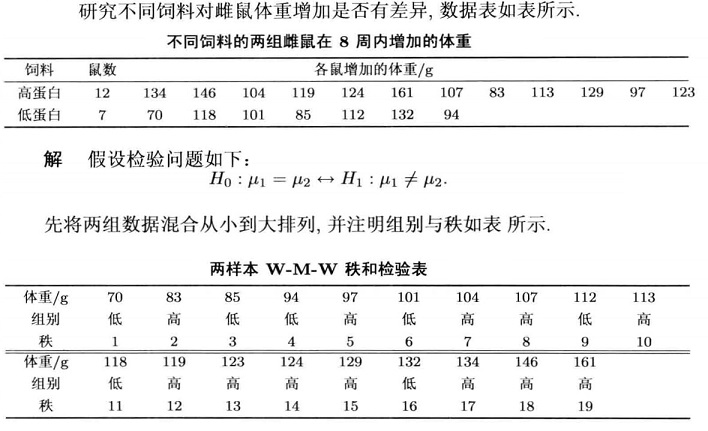


In [13]:
'''
注意在scipy有两个函数进行Wilcoxon-Mann-Whitney秩和检验。
如果h和l的长度相等，则使用wilcoxon函数；
如长度不等，则使用mannwhitneyu函数。
后者使用U统计量。
'''
h=np.array([134,146,104,119,124,161,107,83,113,129,97,123])
l=np.array([70,118,101,85,112,132,94])
st.mannwhitneyu(h,l,alternative='two-sided')


MannwhitneyuResult(statistic=62.0, pvalue=0.09934224785346528)

### 8.3.3 尺度检验：Mood方差检验
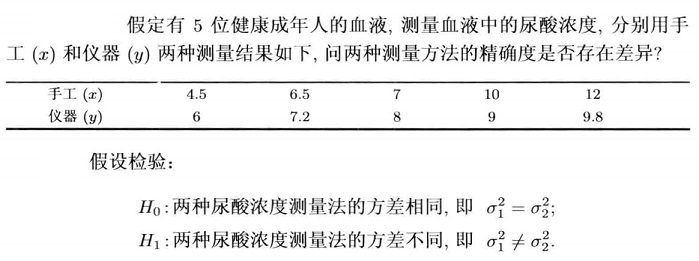

In [56]:
'''
对于尺度的检验，一般是通过两个样本的方差比较进行检验。
参数与非参数统计有多个方差检验方法。
比如参数统计中的bartlett和levene，前面已经上有所介绍。
非参数统计的还有fligner、moses、ansari等。

在本例检验结果可以看出：三种非参尺度检验方法都不能拒绝原假设，
即方差相等，两种测量方式的误差没有显著区别。
'''
meas1=np.array([4.5,6.5,7,10,12])
meas2=np.array([6,7.2,8,9,9.8])
st.mood(meas1,meas2),st.fligner(meas1,meas2),st.ansari(meas1,meas2)

((1.651445647689541, 0.09864761042929915),
 FlignerResult(statistic=1.181491035755236, pvalue=0.2770526592529645),
 AnsariResult(statistic=11.0, pvalue=0.14285714285714285))

--------